# Quick start

> Optimizing data sampling.

In [17]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rasterio

from trufl.utils import gridder
from trufl.sampler import Sampler


%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Create a vector grid from a given raster

In [2]:
fname_raster = '../files/ground-truth-02-4326-simulated.tif'
gdf_grid = gridder(fname_raster, nrows=10, ncols=10)

<Axes: >

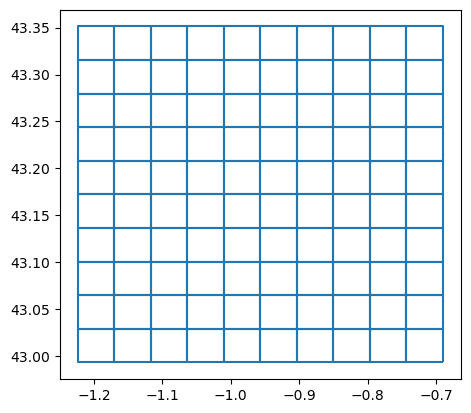

In [3]:
gdf_grid.boundary.plot()

## Emulating data collection

### Random sample

Generating a random set of points within a given polygon geoseries.

<Axes: >

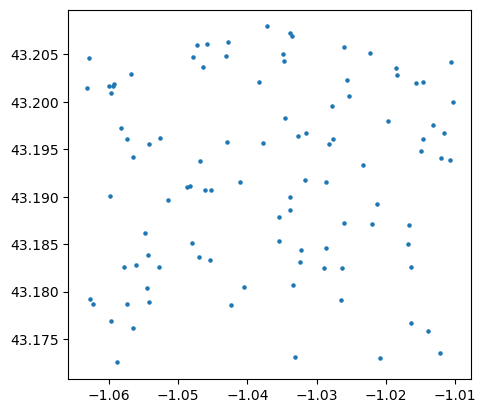

In [4]:
loc_id = 35
n_pts = 100
sampling_locs = gdf_grid.loc[gdf_grid.loc_id == loc_id].sample_points(n_pts)
sampling_locs.plot(markersize=5)

### Emulate data collection

We will simulate a data collection process over a set of areas, which could be administrative units or a gridded version of them. For each area, we will specify the number of measurements to be taken, which we will simulate by generating random numbers between 1 and 100.

For each area, we will follow the following steps:

- **Generate random sample locations**: we will create a set of random coordinates within the bounds of the area, where we will simulate the collection of data.
- **Emulate measurement data**: for each sample location, we will extract the corresponding value from a given raster dataset, which we will use to simulate the actual measurement.

This iterative process will allow us to generate a simulated dataset of measurements, which we can then use for further analysis and modeling.

We will emulate data collection from the raster shown below:

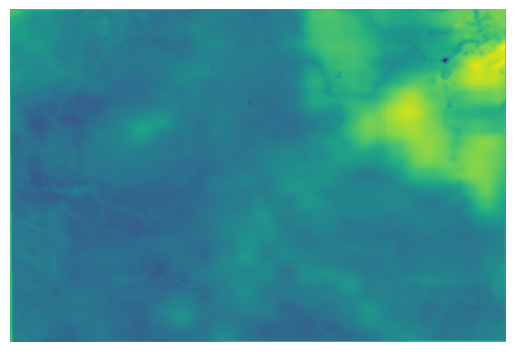

In [22]:
with rasterio.open(fname_raster) as src:
    plt.axis('off')
    plt.imshow(src.read(1))

Let's start with a single area as an example:

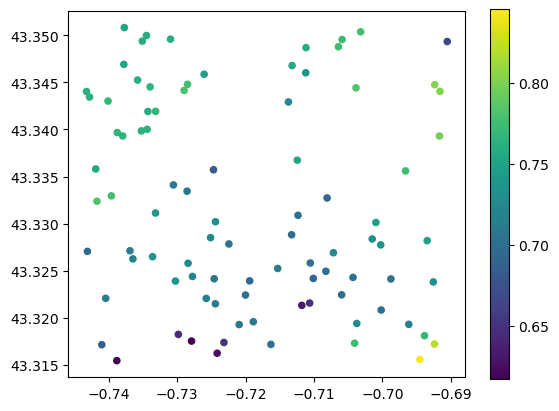

In [8]:
sampler = Sampler(fname_raster)
gdf_samples = sampler.sample(sampling_locs)
gdf_samples.plot(column='value', s=20, legend=True);

Than for all areas iteratively:

In [10]:
sampler = Sampler(fname_raster)
n_planned = np.random.randint(1, high=100, size=len(gdf_grid), dtype=int)
loc_ids = gdf_grid.loc_id.values

samples_t0 = []
for loc_id, n in zip(loc_ids, n_planned):    
    sampling_locs = gdf_grid.loc[gdf_grid.loc_id == loc_id].sample_points(n)
    gdf_samples = sampler.sample(sampling_locs)
    samples_t0.append(gdf_samples)

gdf_samples_t0 = pd.concat(samples_t0)

In [11]:
gdf_samples_t0

,loc_id,geometry,value
0,0,POINT (-1.22335 42.99878),0.666578
1,0,POINT (-1.22033 42.99682),0.439348
2,0,POINT (-1.21988 43.00019),0.430917
3,0,POINT (-1.21894 43.02719),0.404553
4,0,POINT (-1.21533 43.01881),0.418132
...,...,...,...
62,99,POINT (-0.69569 43.33798),0.786721
63,99,POINT (-0.69394 43.31743),0.777015
64,99,POINT (-0.69226 43.32367),0.732429
65,99,POINT (-0.69171 43.32093),0.757368


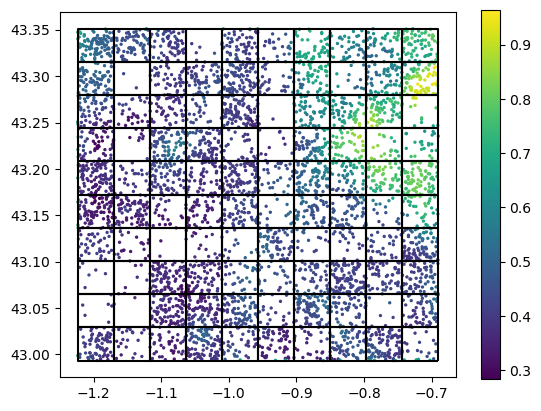

In [26]:
ax = gdf_samples_t0.plot(column='value', s=2, legend=True)
gdf_grid.boundary.plot(color='black', ax=ax);